## 로지스틱 회귀 분류 예제

#### 1.  시그모이드 함수

In [1]:
import numpy as np

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### 2. 손실함수 크로스 엔트로피 구현

In [3]:
def loss_func(x, t):
    delta = 1e-7   # log 무한대 발산 방지
    z = np.dot(x, W) + b
    y = sigmoid(z)
    
    # cross-entropy
    return -np.sum(t*np.log(y+delta) + (1-t)*np.log((1-y)+delta))

#### 3. 예측 함수

In [4]:
def predict(test_data):
    z = np.dot(test_data, W) + b
    y = sigmoid(z)
    if y >= 0.5:
        result = 1   # Pass
    else:
        result = 0   # Fail
    return y, result

# y: 확률값
# result: 분류값

#### 4. 수치 미분 함수

In [5]:
def numerical_derivative(f, x):
    delta_x = 1e-4
    grad = np.zeros_like(x)   # 수치미분된 값을 저장할 ndarray로 x와 같은 크기의 0으로 된 배열 생성
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2 * delta_x)
        
        x[idx] = tmp_val
        it.iternext()   # 다음 인덱스로 이동
        
    return grad

In [6]:
import numpy as np
from datetime import datetime

x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10, 1)
t_data = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(10, 1)

W = np.random.rand(1, 1)
b = np.random.rand(1)

print("x_data.shape =", x_data.shape, "/ t_data.shape =", t_data.shape)
print("W =", W, "/ W.shape =", W.shape, "/ b =", b, "/ b.shape =", b.shape)

x_data.shape = (10, 1) / t_data.shape = (10, 1)
W = [[0.20519151]] / W.shape = (1, 1) / b = [0.40743879] / b.shape = (1,)


#### 5. 수치 미분을 이용한 로지스틱회귀 시스템 학습 과정

In [7]:
learning_rate = 1e-2
f = lambda x : loss_func(x_data, t_data)
print("Initial loss value =", loss_func(x_data, t_data))

start_time = datetime.now()
for step in range(50001):
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 5000 == 0):
        print("step =", step, "/ loss value =", loss_func(x_data, t_data))

Initial loss value = 12.209969534315665
step = 0 / loss value = 11.838409398175736
step = 5000 / loss value = 0.8451727690154458
step = 10000 / loss value = 0.6209650419692165
step = 15000 / loss value = 0.5094811672606328
step = 20000 / loss value = 0.43777538718241726
step = 25000 / loss value = 0.3861439897151999
step = 30000 / loss value = 0.34652368826980307
step = 35000 / loss value = 0.3148488081059649
step = 40000 / loss value = 0.28878888163455047
step = 45000 / loss value = 0.2668866197013555
step = 50000 / loss value = 0.2481716593121093


In [8]:
test_data = np.array([3.0])
(real_val_1, logical_val_1) = predict(test_data)
print("시그모이드 결과 =>", real_val_1, "로지스틱회귀 결과 =>", logical_val_1)

# real_val_1: 획률값 / logical_val_1: 분류값

test_data = np.array([17.0])
(real_val_2, logical_val_2) = predict(test_data)
print("시그모이드 결과 =>", real_val_2, "로지스틱회귀 결과 =>", logical_val_2)

시그모이드 결과 => [1.41410009e-09] 로지스틱회귀 결과 => 0
시그모이드 결과 => [0.99974556] 로지스틱회귀 결과 => 1


## scikit-learn 실습-1

#### 1. 유방암 데이터 불러오기

In [9]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

dataset = load_breast_cancer()
train = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=['cancer'])

In [10]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
dataset.data.shape

(569, 30)

In [12]:
dataset.target.shape

(569,)

In [13]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [15]:
dataset.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [16]:
train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
target.head()

,cancer
0,0
1,0
2,0
3,0
4,0


#### 2. 학습데이터와 타깃데이터를 합쳐서 하나의 데이터 프레임 생성

In [18]:
data = pd.concat([train, target], axis=1)
data.info()   # 데이터 기본 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


#### 3. 학습용 데이터 / 검증용 데이터 생성

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['mean radius']], data[['cancer']], random_state=42)
print(X_train)
print('-----------------------------------------------------------------')
print(y_train)
print('-----------------------------------------------------------------')

# 30개의 컬럼 중 mean radius 만 사용, 정답은 cancer
# test_size => 별도의 언급 없으면 0.25

     mean radius
287       12.890
512       13.400
402       12.960
446       17.750
210       20.580
..           ...
71         8.888
106       11.640
270       14.290
435       13.980
102       12.180

[426 rows x 1 columns]
-----------------------------------------------------------------
     cancer
287       1
512       0
402       1
446       0
210       0
..      ...
71        1
106       1
270       1
435       0
102       1

[426 rows x 1 columns]
-----------------------------------------------------------------


In [21]:
X_train.shape, X_test.shape

((426, 1), (143, 1))

#### 4. 모델 생성 및 학습

<hr>
<h3 style="color:#ff6600;">LogisticRegression</h3>

- 참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br>
<br>
- penalty: 비용 함수('l1', 'l2', 'elsticnet', 'none')를 지정 (default='l2')
- dual: Dual Formulation인지 Promal Formulation인지 결정 (default=False)
- tol: 중지 기준에 대한 허용 오차값
- C: 규칙 강도의 역수값 (default=1.0 / 작을수록 정규화 강)
- fit_intercept: 결정 함수에 상수(bias)를 추가할지 결정 (default=True)
- intercept_scaling: (default=1)
- class_weight: 클래스의 가중치 설정(dict or 'balanced') (default=None)
- <span style="color:#ff6600; font-weight:600;">solver</span>: 최적화에 사용할 알고리즘('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga') (default='lbfgs')
- <span style="color:#ff6600; font-weight:600;">max_iter</span>: solver의 수렴에 걸릴 최대 반복 회수 (default=100)
- <span style="color:#ff6600; font-weight:600;">multi_class</span>: over - 이진 문제 / multinomial - 다중 문제 적합 (default='auto')
- verbose: 로그 정보 출력
- warm_start: 이전 호출에 사용했던 solution을 재사용할지 여부 결정 (default=False)
- n_jobs: 병렬 처리시 사용할 cpu 코어 수
- l1_ratio: (default=None)
- random_state: 난수 시드 설정

<hr>

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

# solver: 최적화에 사용할 알고리즘 설정
# 지도학습 파라미터 2개 => 학습데이터, 정답데이터

C:\project\AI_Source\AI_01\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

#### 5. 모델 예측 및 평가

In [23]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
print("mean radius만으로 예측한 결과:", pred)
accuracy_score(y_test, pred)

# accuracy_score => 분류 모델에서 정확도 계산을 위해 사용

mean radius만으로 예측한 결과: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1]


0.916083916083916

#### 6. 모델 그리기: mean radius 피처가 타깃을 어떻게 분류했는지 확인

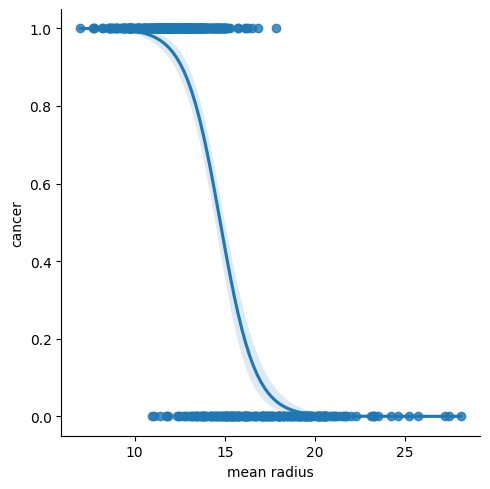

In [24]:
from seaborn import lmplot
import matplotlib.pyplot as plt

lmplot(x="mean radius", y="cancer", data=data, logistic=True)
plt.show()

#### 7. 전체 데이터로 모델 학습 및 평가

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.loc[:, 'cancer'], random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"전체 데이터로 예측한 결과: {score}")

전체 데이터로 예측한 결과: 0.958041958041958


---

#### cf) MinMaxScaler 사용

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(X_train_scaled, y_train)
score = model.score(X_test_scaled, y_test)   # 정확도 계산

print(f"전체 데이터로 예측한 결과: {score}")

전체 데이터로 예측한 결과: 0.972027972027972


#### cf) StandardScaler 사용

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(X_train_scaled, y_train)
score = model.score(X_test_scaled, y_test)   # 정확도 계산

print(f"전체 데이터로 예측한 결과: {score}")

전체 데이터로 예측한 결과: 0.9790209790209791


## scikit-learn 실습-2(타이타닉 데이터)

#### ver1

In [30]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
feature_names = ['pclass', 'age', 'sex']
dfX = df[feature_names].copy()
dfy = df['survived'].copy()

dfX['sex'] = LabelEncoder().fit_transform(dfX['sex'])
dfX['age'].fillna(dfX['age'].mean(), inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfy, test_size=0.3, random_state=1)
X_train.head()

,pclass,age,sex
114,3,17.000000,0
874,2,28.000000,0
76,3,29.699118,1
876,3,20.000000,1
674,2,29.699118,1


In [34]:
log_clf = LogisticRegression()
log_clf.fit(X_train, Y_train)
log_clf.score(X_test, Y_test)

0.7761194029850746